In [1]:
import matplotlib.pyplot as plt
from sympy import solve
from sympy.abc import x

In [2]:
k = 5
lambd = 1 / 9
mu = 1 / 7

psy = lambd / (k * mu)

profit = 50
expenses = 170
work_time = 9

In [3]:
def get_r(equation, power):
    s = solve(equation)
#     print(s)
    return s[0] if power % 2 != 0 else s[1]

r = get_r(x + x ** 2 + x ** 3 + x ** 4 + x ** 5 - (lambd / mu), 5)

print('r =', r)
print('check: ', lambd / mu, ' == ', sum([r ** i for i in range(1, k + 1)]))

r = 0.441675845492114
check:  0.7777777777777778  ==  0.777777777777778


In [4]:
def get_p0(_r, _k):
    return (1 - _r) / _k

def get_pq(_r, _k, _q):
    return (1 - _r ** (_q + 1)) / _k

def get_pkn(_r, _psy, _n):
    return _psy * (1 - _r) * (_r ** _n)

In [5]:
p0 = get_p0(r, k)
print('p0 =', p0)

# а) среднее время ожидания в очереди
temp1 = p0 / (1 - r)
temp2 = (k * (k - 1)) / 2

numerator = r ** 2 * (k * r ** (k - 1) * (1 - r) - (1 - r ** k))
denominator = (1 - r) ** 2
temp3 = numerator / denominator

temp4 = p0 * (1 - r ** k) / (1 - r)
temp5 = (r ** 2) / ((1 - r) ** 2)

b_ = temp1 * (temp2 + temp3) + temp4 * temp5
print('b_ =', b_)

w_ = b_ / lambd
print('Среднее время ожидания в очереди:', w_)

# б) вероятность того, что аттракцион простаивает
p_p = p0 + sum([get_pq(r, k, q) for q in range(1, k)])
print('Вероятность того, что аттракцион простаивает:', p_p)

# в) среднее число человек, ожидающих в очереди 
print('Среднее число человек, ожидающих в очереди:', b_)

# г) вероятность ожидания в очереди 
p_wait_q = sum([get_pq(r, k, q) for q in range(1, k)]) + sum([get_pkn(r, psy, n) for n in range(500)])
print('Вероятность ожидания в очереди:', p_wait_q)

# д) долю времени, в течение которого аттракцион используется 
p_w = 1 - p_p
print('Долю времени, в течение которого аттракцион используется:', p_w)

# е) средние значения выручки и прибыли от использования аттракциона
revenue = profit * k * work_time * p_w * (60 / (1 / mu)) 
print('Среднее значение выручки от использования аттракциона:', revenue)

earnings = expenses * work_time * p_w * (60 / (1 / mu))
print('Среднее значение прибыли от использования аттракциона:', revenue - earnings)

p0 = 0.111664830901577
b_ = 2.01329644304187
Среднее время ожидания в очереди: 18.1196679873768
Вероятность того, что аттракцион простаивает: 0.844444444444444
Среднее число человек, ожидающих в очереди: 2.01329644304187
Вероятность ожидания в очереди: 0.888335169098423
Долю времени, в течение которого аттракцион используется: 0.155555555555556
Среднее значение выручки от использования аттракциона: 3000.00000000000
Среднее значение прибыли от использования аттракциона: 960.000000000000


In [6]:
# Определить, как изменятся средняя прибыль и среднее время ожидания 
# в очереди при различных значениях вместимости аттракциона – от 3 до 10 человек
capacity = list(range(3, 11))
profits = []
w_list = []

equation = x + x ** 2 - (lambd / mu)

for c in capacity:
    equation += x ** c
    r = get_r(equation, c)
    print('r =', r, ':', equation, '\n')
    
    p0 = get_p0(r, c)

    temp1 = p0 / (1 - r)
    temp2 = (c * (c - 1)) / 2

    numerator = r ** 2 * (c * r ** (c - 1) * (1 - r) - (1 - r ** c))
    denominator = (1 - r) ** 2
    temp3 = numerator / denominator

    temp4 = p0 * (1 - r ** c) / (1 - r)
    temp5 = (r ** 2) / ((1 - r) ** 2)

    b_ = temp1 * (temp2 + temp3) + temp4 * temp5

    w_ = b_ / lambd
    w_list.append(w_)

    p_p = p0 + sum([get_pq(r, c, q) for q in range(1, c)])
    p_w = 1 - p_p

    revenue = profit * c * work_time * p_w * (60 / (1 / mu)) 
    earnings = expenses * work_time * p_w * (60 / (1 / mu))
    profits.append(revenue - earnings)
    
print(capacity)
print(profits)
print(w_list)

r = 0.463449746724726 : x**3 + x**2 + x - 0.777777777777778 

r = 0.447606596258337 : x**4 + x**3 + x**2 + x - 0.777777777777778 

r = 0.441675845492114 : x**5 + x**4 + x**3 + x**2 + x - 0.777777777777778 

r = 0.439275334756160 : x**6 + x**5 + x**4 + x**3 + x**2 + x - 0.777777777777778 

r = 0.438265635170457 : x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x - 0.777777777777778 

r = 0.437832579286167 : x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x - 0.777777777777778 

r = 0.437644991369597 : x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x - 0.777777777777778 

r = 0.437563324617438 : x**10 + x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x - 0.777777777777778 

[3, 4, 5, 6, 7, 8, 9, 10]
[-400.000000000000, 450.000000000000, 960.000000000000, 1300.00000000000, 1542.85714285714, 1725.00000000000, 1866.66666666667, 1980.00000000000]
[9.77382490281409, 13.7927361895310, 18.1196679873768, 22.5506582960573, 27.0218077502362, 31.5094656296018, 36.0041252622951, 40.50180

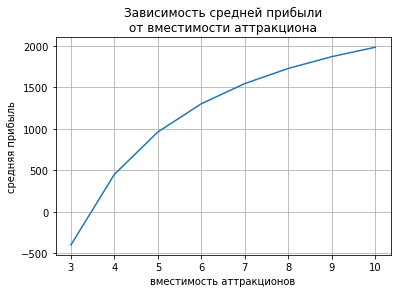

In [7]:
plt.plot(capacity, profits)
plt.title('Зависимость средней прибыли\nот вместимости аттракциона')
plt.xlabel('вместимость аттракционов')
plt.ylabel('средняя прибыль')
plt.grid()
plt.show()

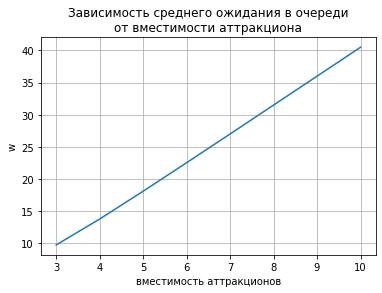

In [8]:
plt.plot(capacity, w_list)
plt.title('Зависимость среднего ожидания в очереди\nот вместимости аттракциона')
plt.xlabel('вместимость аттракционов')
plt.ylabel('w')
plt.grid()
plt.show()